In [1]:
import sys
sys.path.append("../scripts/")
from mcl import *
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

In [2]:
def sigma_ellipse(p, cov, n):
    eig_vals, eig_vec = np.linalg.eig(cov)
    ang = math.atan2(eig_vec[:,0][1], eig_vec[:,0][0])/math.pi*180
    return Ellipse(p, 
                   width=2*n*math.sqrt(eig_vals[0]),
                   height=2*n*math.sqrt(eig_vals[1]),
                   angle=ang,
                   fill=False, color="blue", alpha=0.5)

In [3]:
class KalmanFilter:
    def __init__(self, envmap, init_pose, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2}):
        self.belief = multivariate_normal(mean=np.array([0.0, 0.0, math.pi/4]), cov=np.diag([0.1, 0.2, 0.01]))
        self.pose = self.belief.mean
        
    def motion_update(self, nu, omega, time):
        pass
    
    def observation_update(self, observation):
        pass
    
    def draw(self, ax, elems):
        e = sigma_ellipse(self.belief.mean[0:2], self.belief.cov[0:2, 0:2], 3)
        elems.append(ax.add_patch(e))
        
        x, y, c = self.belief.mean
        sigma3 = math.sqrt(self.belief.cov[2, 2]) * 3
        xs = [x + math.cos(c - sigma3), x, x + math.cos(c + sigma3)]
        ys = [y + math.sin(c - sigma3), y, y + math.sin(y + sigma3)]
        elems += ax.plot(xs, ys, color="blue", alpha=0.5)

<IPython.core.display.Javascript object>


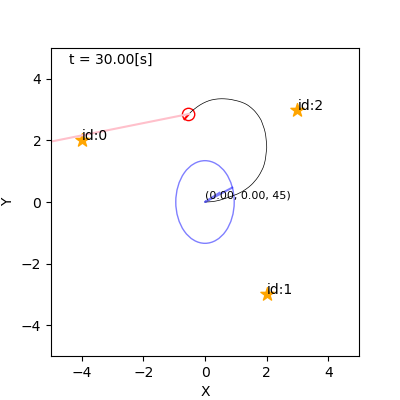

In [5]:
def trial():
    time_interval = 0.1
    world = World(30, time_interval, debug=0)
    
    m = Map()
    for ln in [(-4,2), (2,-3), (3,3)]:
        m.append_landmark(Landmark(*ln))
    world.append(m)
    
    initial_pose = np.array([0, 0, 0]).T
    estimator = KalmanFilter(m, initial_pose)
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
    r = Robot(initial_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)
    
    world.draw()
    
trial()